In [2]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
import pandas as pd

In [3]:
src = pd.read_csv(r"C:\Users\User\Downloads\CC GENERAL.csv")

dataset = pd.DataFrame(src)
dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [109]:
data = dataset.iloc[:,[1,3]]

c = np.c_[data['BALANCE'],data['PURCHASES']]

In [121]:
wcss = []

for i in range(1, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    
    kmeans.fit(c) #Fitting the data 
    wcss.append(kmeans.inertia_) #Inertia function computes sum of distances from the centroid(s)
    
print(wcss)

[79628051265.75504, 51275809064.20937, 33728906755.615826, 24583346535.95167, 19254101362.06792, 15346691198.857018, 12879028149.907255, 11470612117.619936, 10196002918.861605]


Text(0.5, 1.0, 'Elbow Check')

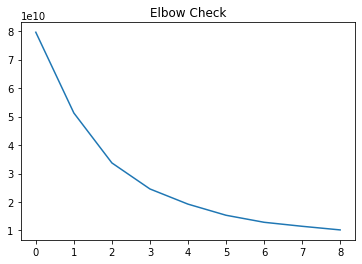

In [122]:
# Checking for de_elbow :)
plt.plot(range(len(wcss)), wcss)

plt.title('Elbow Check')

In [131]:
fitted = KMeans(n_clusters=5).fit(c)

In [132]:
centroid = fitted.cluster_centers_
print(centroid)

[[  518.95557808   607.76600565]
 [ 7274.20056507  1116.96674304]
 [ 2093.31237317  5831.57719124]
 [ 2924.46535541   583.11839733]
 [ 5390.38957129 27690.86583333]]


Text(0.5, 1.0, 'Balance vs Purchases')

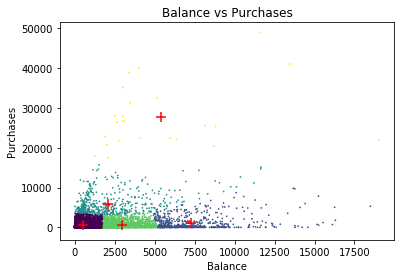

In [133]:
plt.scatter(c[:,0],c[:,1],c=fitted.labels_,s=0.5)
plt.xlabel('Balance'); plt.ylabel('Purchases')

x = [(i[0]) for i in centroid]

y = [(i[1]) for i in centroid]

plt.scatter(x,y,c='red',s=100,marker='+')

plt.title('Balance vs Purchases')

#### Method 2

In [134]:
kmeans = KMeans(n_clusters=5, init='k-means++')
y_kmeans = kmeans.fit(c)

print(y_kmeans)

y_kmeans = y_kmeans.predict(c)

print(y_kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
[3 0 0 ... 3 3 3]


In [146]:
centers = kmeans.cluster_centers_

centers

array([[ 2949.59089129,   581.6926224 ],
       [ 7295.02411873,  1125.41390083],
       [ 2093.31237317,  5831.57719124],
       [  524.15176118,   607.76357663],
       [ 5390.38957129, 27690.86583333]])

<IPython.core.display.Javascript object>


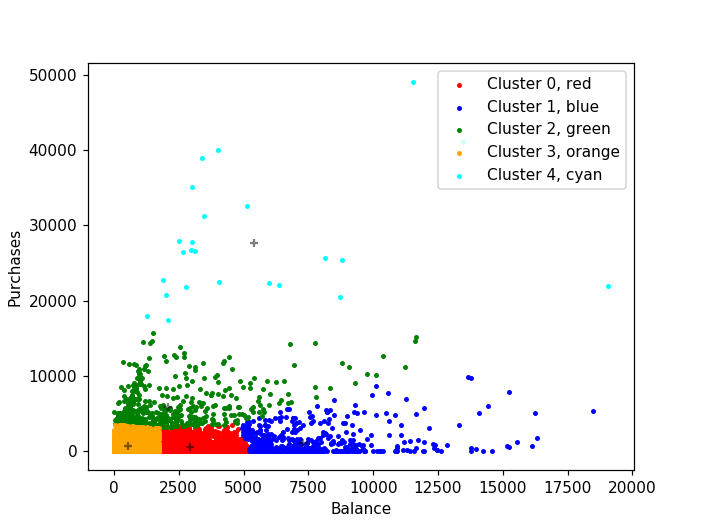

In [160]:
colors = ['red','blue','green','orange','cyan']

for loop in range(5):
    plt.scatter(c[y_kmeans==loop,0],c[y_kmeans==loop,1],c=colors[loop],
                s=5,label=f"Cluster {loop}, {colors[loop]}")

x = [(i[0]) for i in centers]

y = [(i[1]) for i in centers]

plt.scatter(x,y,c='black',s=30,marker='+',alpha=0.5)
    
plt.xlabel('Balance'); plt.ylabel('Purchases')
plt.legend(loc='best')

plt.show()

<font size=30 color='blue'>Conclusion:</font><br>
Orange Cluster is made up of people who earn very little and also do not spend much<br>
Red Cluster earn more than Orange, but do not spend much.<br>
Blue Cluster is made up of people who earn tons but are very stingy<br>
People in Green Cluster spend more than they have,<br>
and people in Cyan Cluster bankrupt soon.<br>


In [162]:
data = pd.read_csv(r"C:\Users\User\Downloads\books.csv",error_bad_lines=False)

b'Skipping line 4012: expected 10 fields, saw 11\nSkipping line 5688: expected 10 fields, saw 11\nSkipping line 7056: expected 10 fields, saw 11\nSkipping line 10601: expected 10 fields, saw 11\nSkipping line 10668: expected 10 fields, saw 11\n'


In [166]:
data

,bookID,title,authors,average_rating,isbn,isbn13,language_code,# num_pages,ratings_count,text_reviews_count
0,1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling-Mary GrandPré,4.56,0439785960,9780439785969,eng,652,1944099,26249
1,2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling-Mary GrandPré,4.49,0439358078,9780439358071,eng,870,1996446,27613
2,3,Harry Potter and the Sorcerer's Stone (Harry P...,J.K. Rowling-Mary GrandPré,4.47,0439554934,9780439554930,eng,320,5629932,70390
3,4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.41,0439554896,9780439554893,eng,352,6267,272
4,5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling-Mary GrandPré,4.55,043965548X,9780439655484,eng,435,2149872,33964
5,8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling-Mary GrandPré,4.78,0439682584,9780439682589,eng,2690,38872,154
6,9,"Unauthorized Harry Potter Book Seven News: ""Ha...",W. Frederick Zimmerman,3.69,0976540606,9780976540601,en-US,152,18,1
7,10,Harry Potter Collection (Harry Potter #1-6),J.K. Rowling,4.73,0439827604,9780439827607,eng,3342,27410,820
8,12,The Ultimate Hitchhiker's Guide: Five Complete...,Douglas Adams,4.38,0517226952,9780517226957,eng,815,3602,258
9,13,The Ultimate Hitchhiker's Guide to the Galaxy,Douglas Adams,4.38,0345453743,9780345453747,eng,815,240189,3954


In [195]:
avr = data['average_rating']
count = data['ratings_count']
book = data['title']

testBk = []
testRtg = []

for i in range(len(avr)):
    if count[i]>100 and 4.99>avr[i]>4.8:
        print(book[i], avr[i], count[i])
        testBk.append(book[i])
        testRtg.append(avr[i])
        
print(max(testRtg), testBk[testRtg.index(max(testRtg))])

The Ragwitch 4.82 2909
The Violet Keystone (The Seventh Tower  #6) 4.86 4984
Lirael (Abhorsen  #2) 4.87 87623
Shade's Children 4.88 10368
Into Battle (The Seventh Tower  #5) 4.91 4887
4.91 Into Battle (The Seventh Tower  #5)


In [13]:
import time

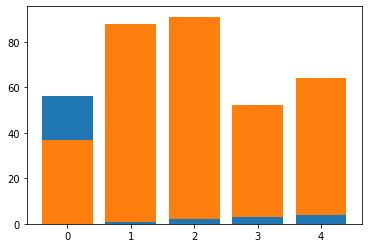

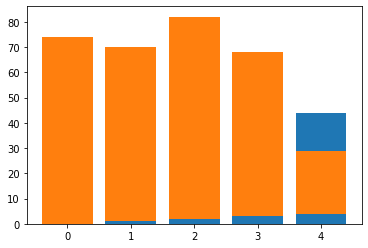

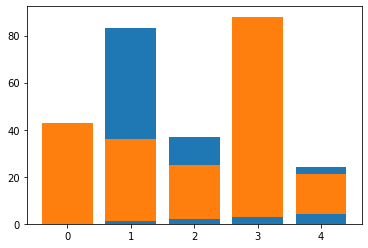

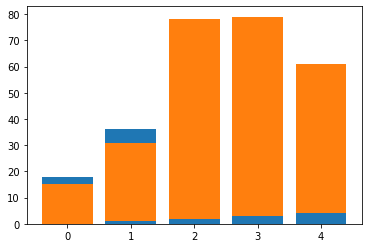

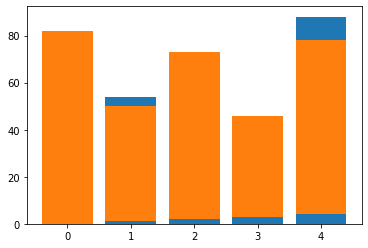

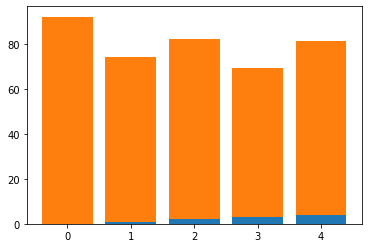

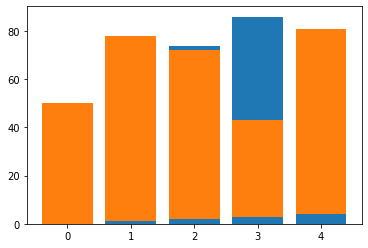

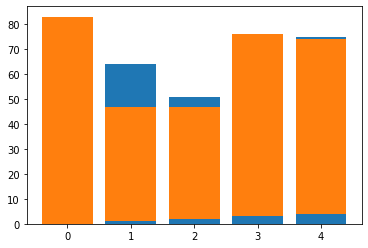

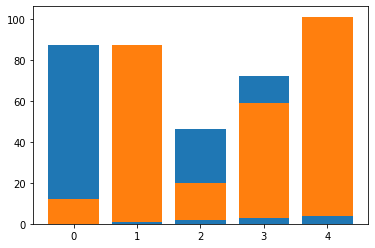

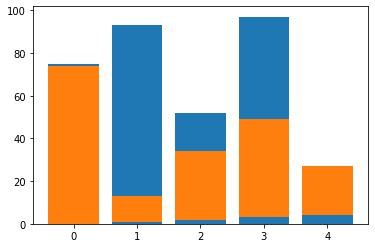

In [15]:
for x in range(10):
    plt.bar(range(5),np.random.randint(10,100,5))
    plt.bar(range(5),np.random.randint(10,100,5),bottom=range(5))
    plt.show()
    time.sleep(3)